In [1]:
import os
import sys
import fitsio
import numpy             as np
import pylab             as pl
import matplotlib.pyplot as plt
import astropy.io.fits   as fits

In [2]:
sys.path.append('{}'.format(os.environ['HOME']))
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [3]:
import pubplot

from schechter     import schechter, named_schechter
from gama_limits   import gama_field
from delta8_limits import d8_limits, delta8_tier
from findfile      import findfile, fetch_fields
from lumfn         import multifield_lumfn
from astropy.table import Table

In [4]:
n8 = Table.read(findfile(ftype='ddp_n8'))
n8

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3],WEIGHT_STEPWISE,RANDSEP,RANDMATCH,BOUND_DIST,FILLFACTOR,FILLFACTOR_VMAX,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP1_DELTA8_TIER
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,int64
86187,587722983890026653,185.64764412,0.45825774,17.885168,0.23773,4,G12_Y1_IN1_366,6,20.97136,19.13244,17.69423,17.180195,16.8645,0.23773,840.5726708609474,39.62287632944614,G12,0,0,-675.8062612682004,-66.83079688776589,5.431651350640607,676.2613794170416,62.116879849571745,4.6905186350961925,1.4382114,17.885168,1.0221831617635122,0,6,0.10036243227669306,0.5163907115532198,0.33652183845436306,0.9173801631494414,0.8573531163449608,0.8,-0.2305981,-0.190184,-21.84363198535866,-21.884046095184747,-22.074230092338983,39.72880006092018,39.9593981679005,39.76921417074627,-0.02610221695577676,0.25065673311151676,0.19062266140642437,0.51583202282518,-21.69773280831072,1.9148312,0.44663114086923167,0.0,-5.885168,0.019571442349045218,0.0,32958772.02542144,1 .. 0,1 .. 0,8.149568154070954,0.6893363086452775,1236822,3.7346454516904664,0.8329989341555409,0.7797192364390116,30,0,0,1.7524694764119797,6
617429,588848900463329480,211.51215914,0.33337858,16.491335,0.05383,4,G15_Y6_072_126,6,18.441204,17.068653,16.389126,15.991108,15.69622,0.05383,168.3225606128227,36.13071164621924,G15,2,0,-136.1675749443299,-83.48335106299008,0.9293608415316806,136.7473174971628,82.53184613359454,0.779495741336187,0.6795273,16.491335,0.743982896440262,0,5,-0.1549470888593293,-0.2194027025847476,0.07143610749723148,0.0980003458903182,0.652963044321757,0.8,-0.052215103,-0.043064002,-19.65859773549533,-19.667748836607696,-19.710812838555338,36.14993265065647,36.202147753716474,36.15908375176883,-0.14544953276563438,-0.1915606934090779,0.07127534559656673,0.07361459630458539,-19.658436973594668,3.3086643,0.21805927999858019,0.0,-4.491335,0.007133602958665704,0.0,4474382.595745936,0 .. 0,1 .. 1,1.289117707077976,1.4134335483862235,902987,0.5215284765929623,0.519196368979678,0.7482909501178633,40,55,117,-99.0,-99
594128,588848899929800874,219.05986017,-0.07440745,17.661882,0.13694,5,344534744807008256,6,19.502266,18.28102,17.649033,17.278406,17.08318,0.13694,454.3391400668327,38.286900758504636,G15,0,0,-310.2965986762804,-251.81045450990524,-0.5189628516176182,312.04413432684754,249.64068275010177,-0.8609420807934335,0.6319866,17.661882,0.5739814157838801,0,4,-0.08154459967853901,-0.023539397420426808,0.13025891341234525,0.2316107736620236,0.5306347577923138,2.12,-0.13283181,-0.2903128,-20.622445459499378,-20.464964474573154,-20.755277271404285,38.28432786001208,38.417159671916984,38.12684687508585,-0.07849917485313306,-0.019353226563168485,0.13822570350906804,0.2458220631504948,-20.6304122495961,2.1381168,0.3781070072100413,0.0,-5.6618824,0.01032225711327355

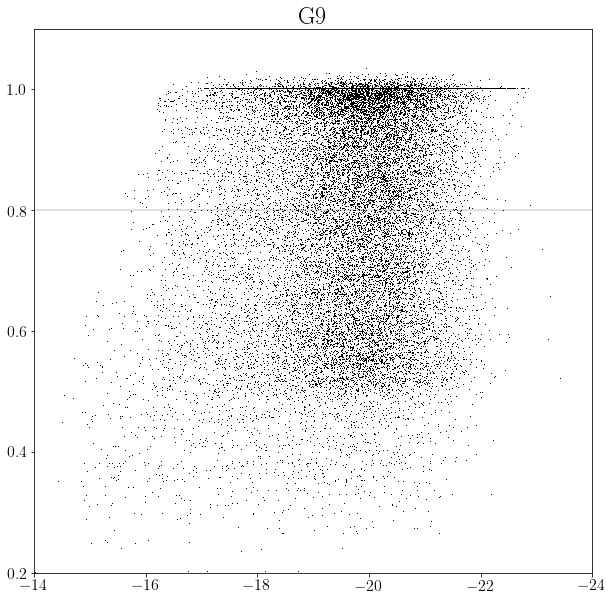

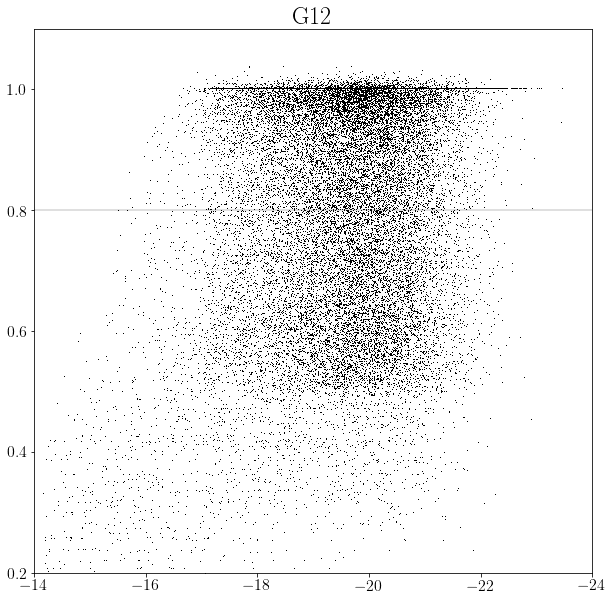

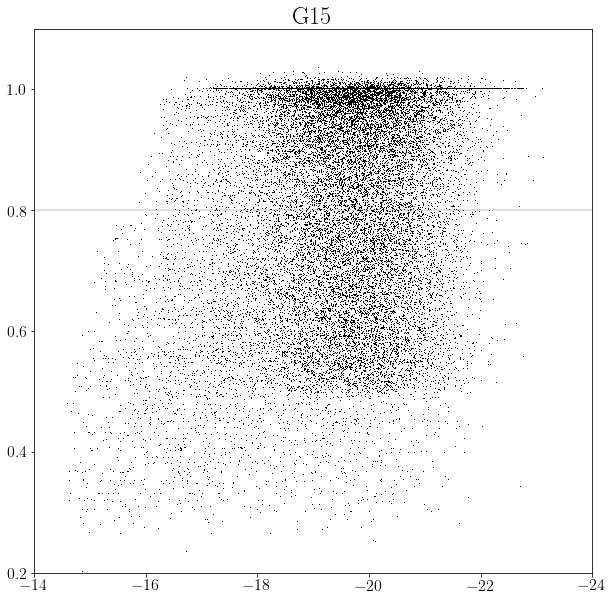

In [18]:
for field in ['G9', 'G12', 'G15']:
    isin = n8['FIELD'] == field

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
    pl.sca(ax)
    pl.clf()
    pl.axhline(0.8, c='k', lw=0.25)
    pl.plot(n8['MCOLOR_0P0'][isin], n8['FILLFACTOR'][isin], marker=',', lw=0.0, c='k')
    pl.xlim(-14.,-24.)
    pl.ylim(0.2, 1.1)
    pl.title(field)
    pl.show()

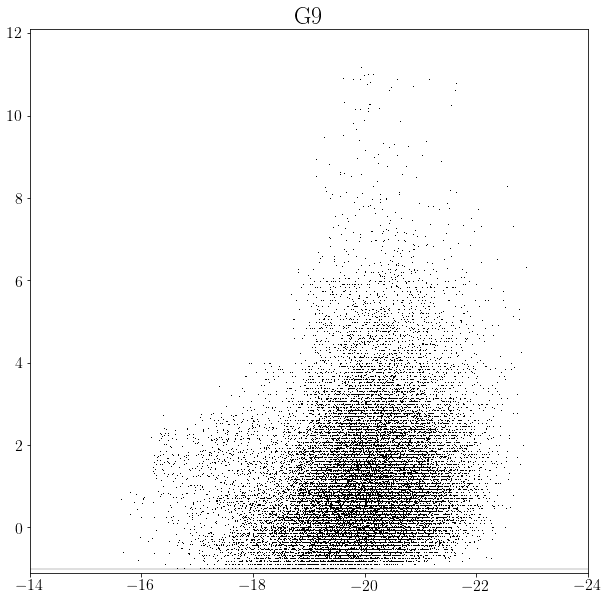

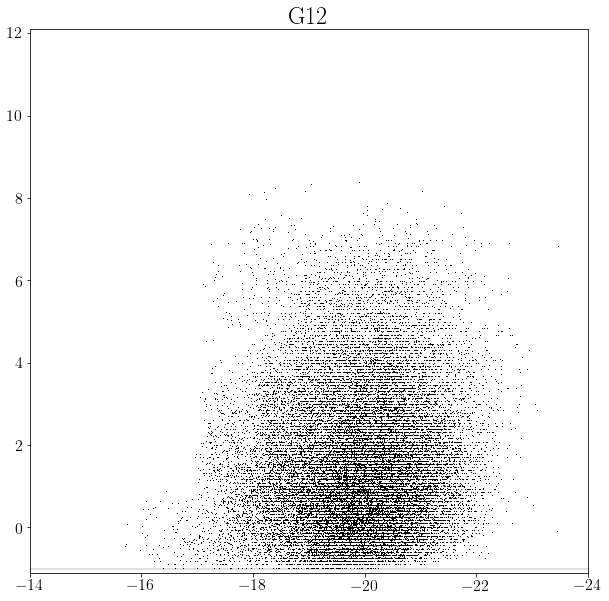

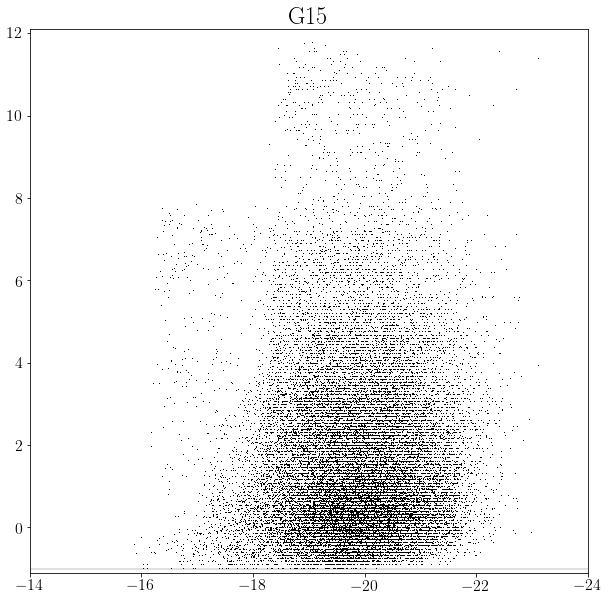

In [16]:
for field in ['G9', 'G12', 'G15']:
    isin = n8['FIELD'] == field

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
    pl.sca(ax)
    pl.clf()
    pl.axhline(-1., c='k', lw=0.25)
    pl.plot(n8['MCOLOR_0P0'][isin], n8['DDP1_DELTA8'][isin], marker=',', lw=0.0, c='k')
    pl.xlim(-14., -24.)
    pl.ylim(-1.1, 12.1)
    pl.title(field)
    pl.show()

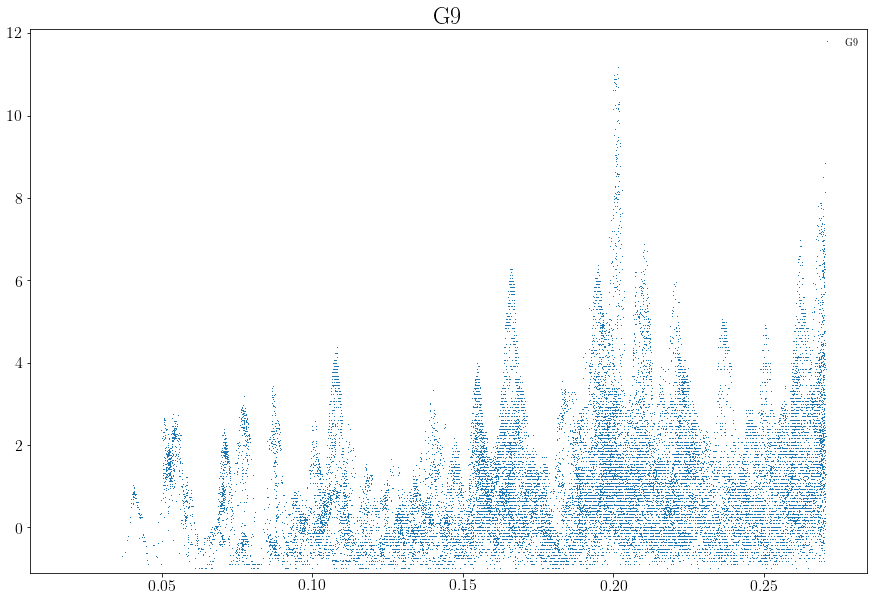

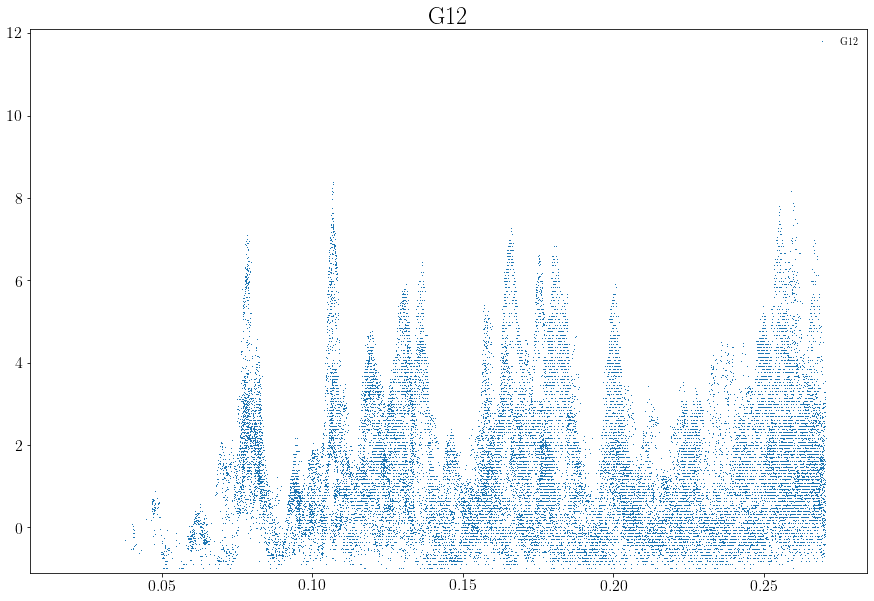

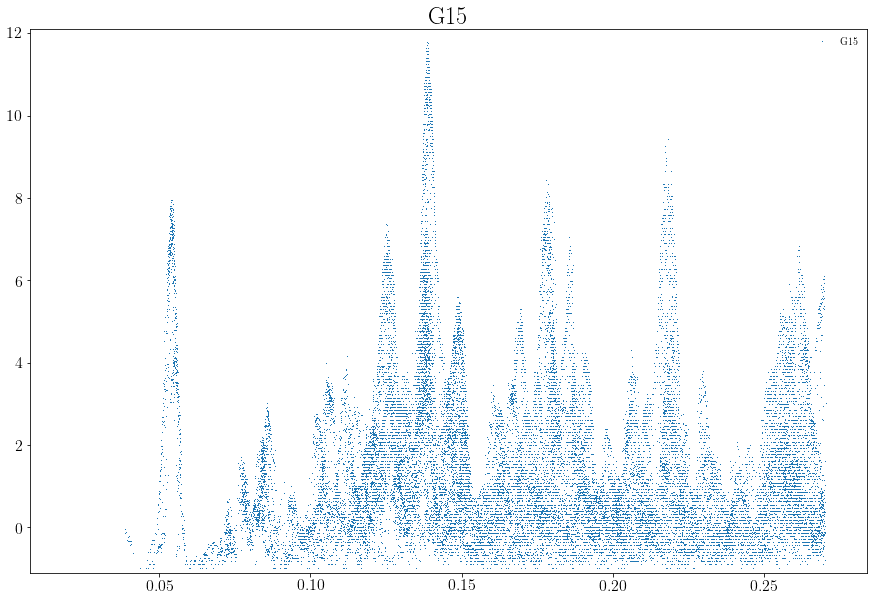

In [17]:
for field in ['G9', 'G12', 'G15']:
    isin = n8['FIELD'] == field

    fig, ax = plt.subplots(1,1,figsize=(15,10))
    
    pl.sca(ax)
    
    pl.plot(n8['ZSURV'][isin], n8['DDP1_DELTA8'][isin], marker=',', lw=0.0, label=field)
    pl.ylim(-1.1, 12.1)
    pl.title(field)
    pl.legend(frameon=False)

# Done.